# This notebook plots the loss and accuracy of each model

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Reading results files from models:

In [84]:
def readResults(path):
    f = open(path, "r")
    perfs = []

    lines = f.readlines()


    for i, el in enumerate(lines):

        values = []

        elements = el.split("|")#| evaluation | time: {:5.2f}s | valid loss (pure) {:5.4f} | Acc {:8.4f}

        values.append(int(i))

        elements = elements[3:]
        
        for i, val in enumerate(elements):
            if("\n" not in val):
                values.append(float(val.split(")")[1]))
            else:
                val = val[:-2]
                values.append(float(val.split(" ")[-1]))

        perfs.append(values)


    f.close()
    return np.array(perfs)

## Plotting the results:

In [85]:
## Defining the plot function:

def plotPerf(values, name = "Model", vert_line = False, at_x_value = 40):
    
    plt.figure(figsize=(15,10))

    
    labels = ["valid_loss_val (pure)", "Accuracy_val"]
    for i, label in enumerate(labels):
        plt.plot(values[:,0], values[:,i+1], label=label)
    
    ## If the user wants to plot a vertical line, we do so at_x_value:
    if(vert_line):plt.axvline(x=at_x_value,color='gray', label="Optimal Capacity", linestyle='--')
    
    plt.title("The performance of the " + name, fontsize=20)
    plt.xlabel("Number of Epochs", fontsize=15)
    #plt.ylabel("")
    leg = plt.legend(loc='upper right', ncol=1, mode="no", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)
    plt.show()

In [86]:
def PlotPerfs(values, name):
    plotPerf(values, name)

    ## Computing max accuracy on validation in percentage:
    Max_accuracy = max(values[:,2]) * 100
    Min_loss     = min(values[:,1])

    print('\n \t\t Maximum accuracy on validation set is : {:5.4f}% and min loss is : {:8.4f}'.format(Max_accuracy, Min_loss))

## Models on small datasets:

In [89]:
path = "train_logs/with_sched3.res"

perfs = readResults(path)

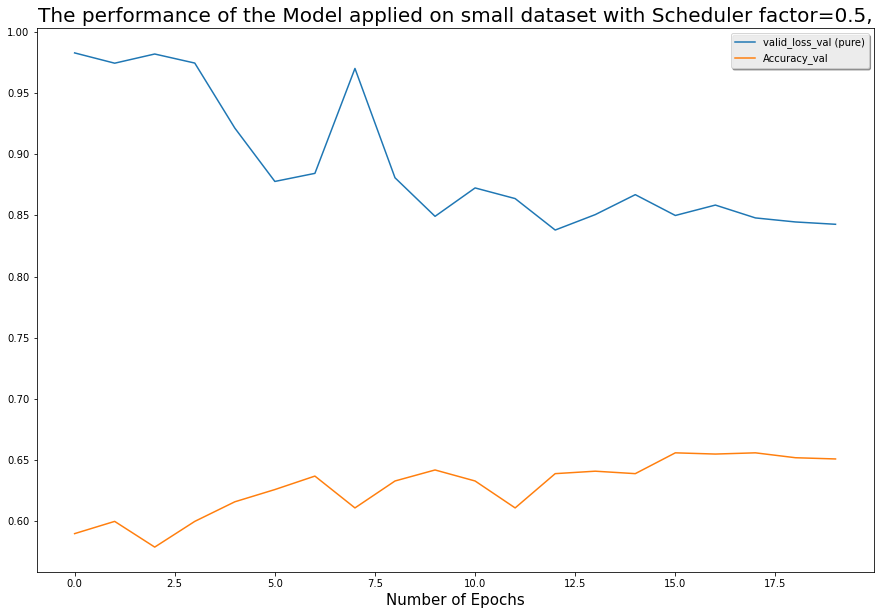


 		 Maximum accuracy on validation set is : 65.6000% and min loss is :   0.8380

					    This model used 9,942,605 parameters.


In [91]:
## Organizing all the needed data in lists:
name = 'Model applied on small dataset with Scheduler factor=0.5,'

PlotPerfs(perfs, name)
print("\n\t\t\t\t\t    This model used {} parameters.".format("9,942,605"))